In [20]:
import pandas as pd
Insurance_full = pd.read_csv("Insurance.csv", sep=",", parse_dates=['Date'])
Insurance_full.info()
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime

Insurance_full['D'] = Insurance_full['Date'.replace('-',' ')]






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     298 non-null    datetime64[ns]
 1   ALL      298 non-null    float64       
 2   PGRE     298 non-null    float64       
 3   BRO      298 non-null    float64       
 4   CB       298 non-null    float64       
 5   MET      298 non-null    float64       
 6   UNH      298 non-null    float64       
 7   TRV      298 non-null    float64       
 8   Average  298 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 21.1 KB


In [21]:
print(Insurance_full.head(n=10))

        Date         ALL       PGRE        BRO          CB        MET  \
0 2020-01-02  104.731537  12.649309  38.742298  147.620743  46.311920   
1 2020-01-03  104.740837  12.769778  38.781425  147.393677  45.836426   
2 2020-01-06  105.047165  12.862448  38.752079  148.604736  45.710819   
3 2020-01-07  104.146706  12.714177  38.634708  145.633820  46.015862   
4 2020-01-08  104.434486  12.769778  38.918354  144.640320  46.500324   
5 2020-01-09  105.622726  12.769778  39.446529  145.662155  46.984798   
6 2020-01-10  105.316376  12.880979  39.514999  142.861526  47.074512   
7 2020-02-03  110.514877  13.075584  44.610867  144.980942  44.978504   
8 2020-02-04  111.350365  13.205322  45.242908  145.993347  45.440144   
9 2020-02-05  115.731972  13.242391  45.517288  156.429535  46.644035   

          UNH         TRV     Average          D  
0  283.774139  128.134659  108.852086 2020-01-02  
1  280.902496  127.678123  108.300395 2020-01-03  
2  282.852478  127.817886  108.806802 2020-

<function matplotlib.pyplot.show(close=None, block=None)>

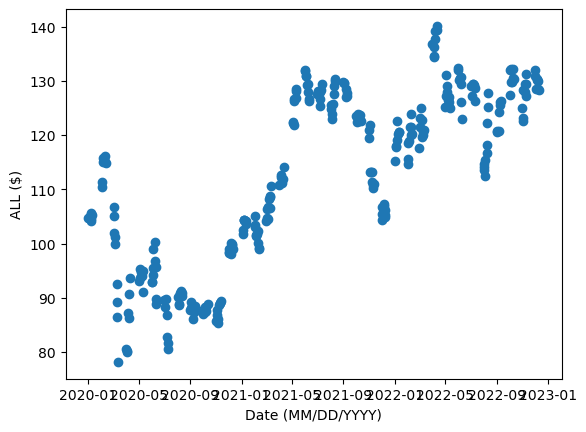

In [22]:
import matplotlib.pyplot as plt
date = Insurance_full['Date']
ALL = Insurance_full['ALL']
PGRE = Insurance_full['PGRE']
BRO = Insurance_full['BRO']
CB = Insurance_full['CB']
MET = Insurance_full['MET']
UNH = Insurance_full['UNH']
TRV = Insurance_full['TRV']
Average = Insurance_full['Average']
plt.scatter(date, ALL)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('ALL ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

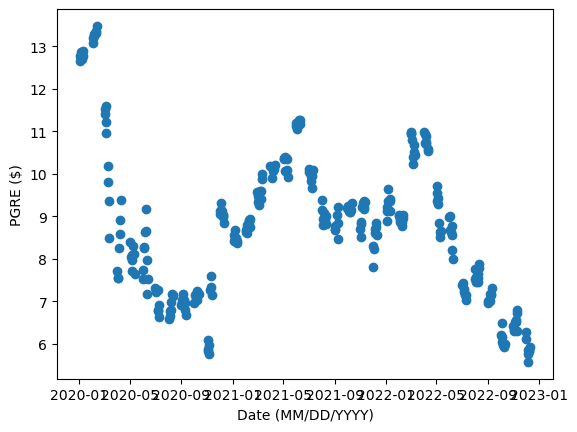

In [4]:
plt.scatter(date, PGRE)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('PGRE ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

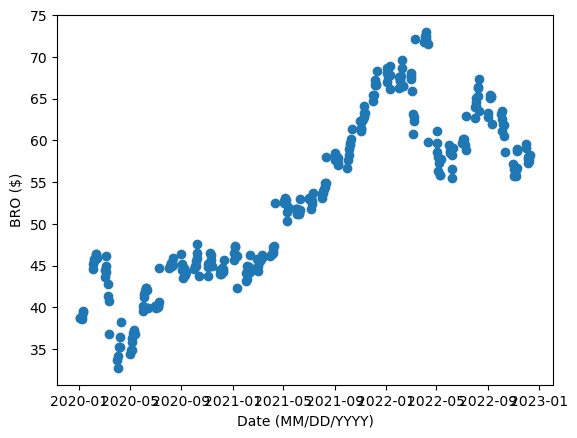

In [5]:
plt.scatter(date, BRO)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('BRO ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

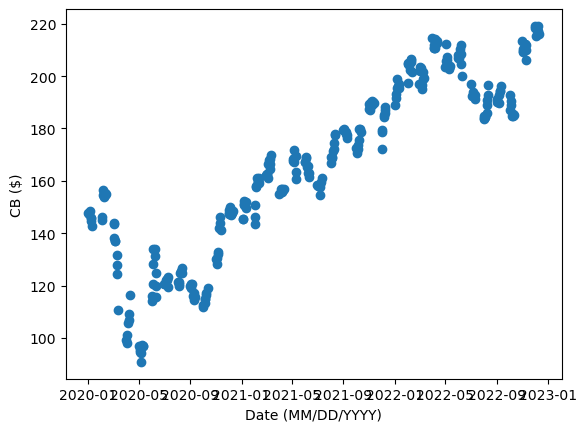

In [6]:
plt.scatter(date, CB)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('CB ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

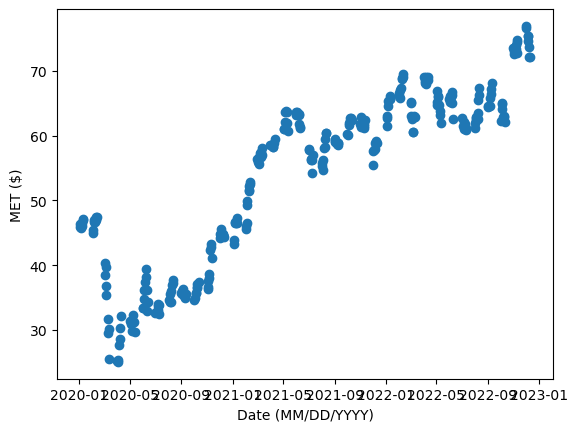

In [7]:
plt.scatter(date, MET)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('MET ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

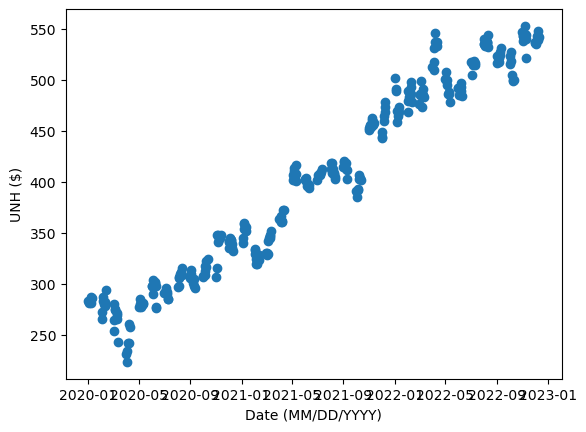

In [8]:
plt.scatter(date, UNH)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('UNH ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

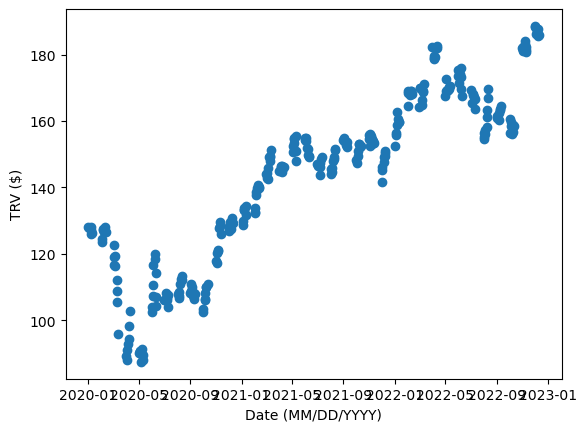

In [9]:
plt.scatter(date, TRV)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('TRV ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

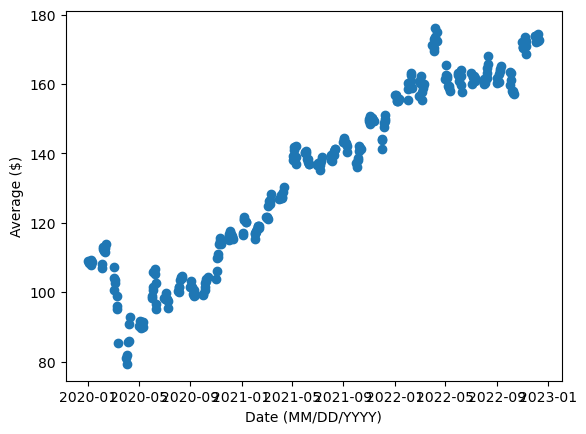

In [10]:
plt.scatter(date, Average)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('Average ($)')
plt.show

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Insurance_full, 
                                        test_size=.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  238 Test size:  60


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -357.5031429467148
    Coefficients [1.44751385e-89 0.00000000e+00 1.14617935e-52]
    Score 0.907654778638979
MAE is  6.185535639748786
RMSE is  7.7385749127193355
MSE is  59.88554167976907
R^2   0.907654778638979

Results for polynomial regression on test data
MAE is  6.1000934361900185
RMSE is  7.814786238209164
MSE is  61.07088394890334
R^2     0.9281004920170124


In [25]:



power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -1437.6460786709008
    Coefficients [ 1.00846957e-15 -1.32761781e-35 -7.29461359e-54]
    Score 0.9081044892110932
MAE is  6.100421046066992
RMSE is  7.71970893247344
MSE is  59.59390600211021
R^2   0.9081044892110932

Results for elastic net on test data
MAE is  5.904232811785531
RMSE is  7.689272110222986
MSE is  59.12490558505306
R^2     0.930391516444028


C:\Users\jstcl\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.092e+03, tolerance: 1.543e+01
  model = cd_fast.enet_coordinate_descent(
